In [121]:
# dataset: https://www.kaggle.com/datasets/lumaatabbaa/vr-eyes-emotions-dataset-vreed
# research paper: https://dl.acm.org/doi/abs/10.1145/3495002
# reference: https://www.kaggle.com/code/ddzsotjan/et-sig-et-and-ai-workshop-notebook

# objective: to increase model robustness using only eye-tracking data and non-NN machine learning methods

# idea: regression/classification of a feature, then average or replace original feature column with predicted values. For each iteration, 
# do this for every feature. See if the values converge or not. Use the modified values to do actual prediction task. 

In [145]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

# df_ET : df Eye Tracking
df_ET = pd.read_csv('./data/EyeTracking.csv')
df_ECG = pd.read_csv('./data/ECG.csv')
df_GSR = pd.read_csv('./data/GSR.csv')
labels = df_ET['Quad_Cat']

# The datasets are aligned such that corresponding rows in each dataset refer to the same experimental instance
df_labels = pd.concat([df_ET['Quad_Cat'], df_ECG['Quad_Cat'], df_GSR['Quad_Cat']], axis = 1)

In [146]:
import warnings
from sklearn.exceptions import ConvergenceWarning

# please, no warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=ConvergenceWarning)
os.environ['PYTHONWARNINGS']='ignore'

In [147]:
# check that labels in each dataset do indeed correspond with each other
df_labels.corr()

,Quad_Cat,Quad_Cat,Quad_Cat
Quad_Cat,1.0,1.0,1.0
Quad_Cat,1.0,1.0,1.0
Quad_Cat,1.0,1.0,1.0


In [148]:
# drop labels in each data set
df_ET = df_ET.drop(columns=['Quad_Cat'])
df_ECG = df_ECG.drop(columns=['Quad_Cat'])
df_GSR = df_GSR.drop(columns=['Quad_Cat'])

df_ET = df_ET.add_prefix('ET_')
df_ECG = df_ECG.add_prefix('ECG_')
df_GSR = df_GSR.add_prefix('GSR_')

In [149]:
df_COMBINED = pd.concat([df_ET, df_ECG, df_GSR], axis = 1)

In [150]:
df_COMBINED.corr()

,ET_Num_of_Fixations,ET_Mean_Fixation_Duration,ET_SD_Fixation_Duration,ET_Skew_Fixation_Duration,ET_Max_Fixation_Duration,ET_First_Fixation_Duration,ET_Num_of_Saccade,ET_Mean_Saccade_Duration,ET_SD_Saccade_Duration,ET_Skew_Saccade_Duration,...,ECG_pnn20,ECG_Pnn50pnn20,GSR_Mean,GSR_SD,GSR_Variance,GSR_Minimum,GSR_Maximum,GSR_Number of Peaks,GSR_Number of Valleys,GSR_Ratio
ET_Num_of_Fixations,1.000000,-0.604457,-0.734658,0.172732,-0.718275,-0.410209,0.999119,0.310356,0.343761,0.190974,...,0.001587,0.057426,-0.031133,-0.082772,-0.046696,-0.013711,-0.047219,-0.074388,-0.073778,-0.062173
ET_Mean_Fixation_Duration,-0.604457,1.000000,0.886562,-0.279585,0.706204,0.358865,-0.602993,-0.230428,-0.255638,-0.208530,...,0.044787,0.030092,-0.061387,0.057892,0.019307,-0.069916,-0.040893,-0.053944,-0.051923,-0.038809
ET_SD_Fixation_Duration,-0.734658,0.886562,1.000000,-0.080770,0.918578,0.339606,-0.732574,-0.248090,-0.251009,-0.182559,...,0.029556,0.021072,-0.045730,0.066747,0.025560,-0.059350,-0.025205,-0.011441,-0.012723,-0.012616
ET_Skew_Fixation_Duration,0.172732,-0.279585,-0.080770,1.000000,0.244157,-0.181054,0.175485,0.173949,0.233899,0.148649,...,-0.084109,0.022980,0.080460,-0.008288,-0.012130,0.071840,0.063246,0.015385,0.012661,-0.082032
ET_Max_Fixation_Duration,-0.718275,0.706204,0.918578,0.244157,1.000000,0.283682,-0.714371,-0.228214,-0.198350,-0.101977,...,-0.005872,0.012087,-0.017325,0.062715,0.022004,-0.032797,-0.000485,-0.006487,-0.005771,-0.056692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
GSR_Minimum,-0.013711,-0.069916,-0.059350,0.071840,-0.032797,-0.025304,-0.016354,0.111894,0.068558,-0.001583,...,0.132205,-0.006347,0.982255,0.285223,0.109878,1.000000,0.943303,0.309728,0.281482,0.284999
GSR_Maximum,-0.047219,-0.040893,-0.025205,0.063246,-0.000485,0.020391,-0.048629,0.036852,-0.002272,0.022946,...,0.140694,0.023735,0.980993,0.573800,0.370272,0.943303,1.000000,0.378274,0.349991,0.329451
GSR_Number of Peaks,-0.074388,-0.053944,-0.011441,0.015385,-0.006487,0.089969,-0.081121,0.137264,0.103710,-0.064282,...,-0.043895,0.014925,0.368421,0.339429,0.250338,0.309728,0.378274,1.000000,0.985503,0.848455
GSR_Number of Valleys,-0.073778,-0.051923,-0.012723,0.012661,-0.005771,0.087127,-0.080180,0.128050,0.101421,-0.049485,...,-0.043487,0.018899,0.340599,0.328542,0.240705,0.281482,0.349991,0.985503,1.000000,0.815625


In [151]:
from sklearn.preprocessing import StandardScaler

# fill nan's with mean value
df_ET = df_ET.fillna(df_ET.mean())
df_ECG = df_ECG.fillna(df_ECG.mean())
df_GSR = df_GSR.fillna(df_GSR.mean())
df_COMBINED = df_COMBINED.fillna(df_COMBINED.mean())

df_ET = pd.DataFrame(StandardScaler().fit_transform(df_ET), columns=df_ET.columns)
df_ECG = pd.DataFrame(StandardScaler().fit_transform(df_ECG), columns=df_ECG.columns)
df_GSR = pd.DataFrame(StandardScaler().fit_transform(df_GSR), columns=df_GSR.columns)
df_COMBINED = pd.DataFrame(StandardScaler().fit_transform(df_COMBINED), columns=df_COMBINED.columns)

df_COMBINED_COPY = pd.DataFrame.copy(df_COMBINED)

In [152]:
labels

0      1
1      0
2      0
3      3
4      1
      ..
307    2
308    0
309    1
310    3
311    3
Name: Quad_Cat, Length: 312, dtype: int64

In [ ]:
plt.figure(figsize=(16, 11))
sns.set(
    rc = {
        'font.size':9
    }
)
sns.heatmap(df_COMBINED.corr(), annot=False, cmap="coolwarm")

In [131]:
corr = df_COMBINED.corr().abs()

visited = set()

columns = corr.columns
# print(columns)
for i in range(len(columns)):
    for j in range(i+1,len(columns)):
        if corr.iloc[i][j] > 0.90 and corr.iloc[i][j] < .99:
            # print(columns[i], columns[j], corr.iloc[i][j])
            if columns[i] not in visited and columns[j] not in visited:
                visited.add(columns[i])
                print(corr.iloc[i][j])
print(len(columns), len(visited))
print(list(visited))

df_COMBINED.drop(list(visited), axis=1, inplace=True)

# TODO: find collinearities

0.9185782023083294
0.903044322858022
0.9206841501303374
0.9167471972640386
0.9167471972647756
0.9167471972607715
0.9104559325951811
0.9054927129472031
0.9868107875527542
0.9837868123219821
0.9822552465935727
0.9433033108776329
0.9855029975746447
75 13
['ET_SD_Saccade_Amplitude', 'ECG_Ibi', 'GSR_Number of Peaks', 'ET_Mean_Saccade_Length', 'ET_Mean_Saccade_Amplitude', 'GSR_Minimum', 'ET_SD_Blink_Duration', 'ET_SD_Microsac_Ampl', 'GSR_Mean', 'ET_SD_Fixation_Duration', 'ET_SD_Saccade_Duration', 'ET_Mean_Saccade_Duration', 'ET_Mean_Blink_Duration']


<Axes: >

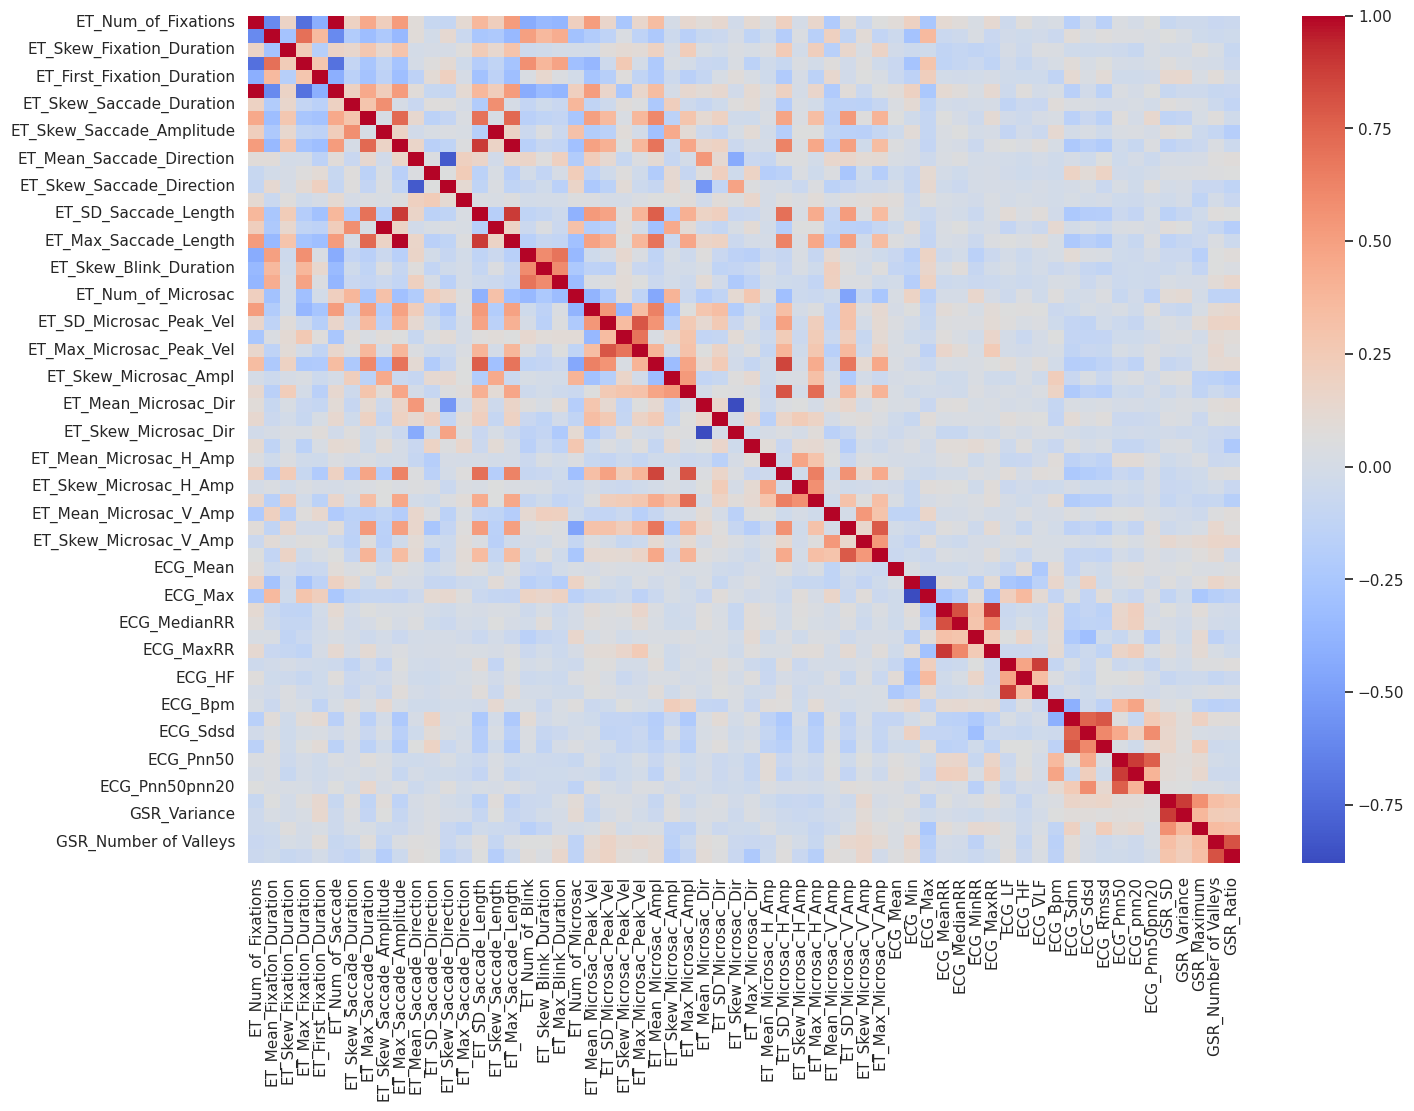

In [132]:
plt.figure(figsize=(16, 11))
sns.set(
    rc = {
        'font.size':9
    }
)
sns.heatmap(df_COMBINED.corr(), annot=False, cmap="coolwarm")

In [133]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X_train_COMBINED, X_test_COMBINED, y_train_COMBINED, y_test_COMBINED =  train_test_split(df_COMBINED, labels, test_size=0.1)

logreg = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced'],
    'l1_ratio': [0.1, 0.5, 0.9],
}

grid_logistic_COMBINED = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=0)

grid_logistic_COMBINED.fit(X_train_COMBINED, y_train_COMBINED)

best_params = grid_logistic_COMBINED.best_params_
best_score = grid_logistic_COMBINED.best_score_

print(best_params)
print(best_score)

prediction = grid_logistic_COMBINED.best_estimator_.predict(X_test_COMBINED)

test_labels = np.array(y_test_COMBINED)
print(prediction)
print(test_labels)

total = len(np.array(prediction == test_labels))
correct = len(np.where(np.array(prediction == test_labels) == True)[0])
print(correct/total)

{'C': 1, 'class_weight': None, 'l1_ratio': 0.1, 'max_iter': 300, 'penalty': 'l1', 'solver': 'saga'}
0.7142857142857144
[2 0 0 1 2 2 0 3 3 1 2 2 0 0 1 0 1 1 1 2 2 2 1 0 3 0 1 3 0 0 1 3]
[1 0 2 2 2 2 0 3 0 1 1 2 3 0 2 0 0 1 1 2 1 2 2 0 3 0 0 3 0 0 1 3]
0.65625


In [134]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [13, 15, 17, 19, 21],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [0, 5, 10, 20, 30, 40, 50],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

grid_knn_COMBINED = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, n_jobs=-1, verbose=0)
grid_knn_COMBINED.fit(X_train_COMBINED, y_train_COMBINED)

best_params = grid_knn_COMBINED.best_params_
best_score = grid_knn_COMBINED.best_score_

print(best_params)
print(best_score)

prediction = grid_knn_COMBINED.best_estimator_.predict(X_test_COMBINED)

test_labels = np.array(y_test_COMBINED)
print(prediction)
print(test_labels)

total = len(np.array(prediction == test_labels))
correct = len(np.where(np.array(prediction == test_labels) == True)[0])
print(correct/total)

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 13, 'p': 1, 'weights': 'uniform'}
0.46071428571428574
[2 0 0 1 2 2 0 2 1 2 2 2 2 0 2 0 0 1 1 2 0 2 2 1 2 0 0 0 0 0 1 3]
[1 0 2 2 2 2 0 3 0 1 1 2 3 0 2 0 0 1 1 2 1 2 2 0 3 0 0 3 0 0 1 3]
0.625


In [135]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier()
grid_rf_COMBINED = GridSearchCV(estimator=rf, param_grid=param_grid, cv=10, n_jobs=-1, verbose=0)
grid_rf_COMBINED.fit(X_train_COMBINED, y_train_COMBINED)

best_params = grid_rf_COMBINED.best_params_
best_score = grid_rf_COMBINED.best_score_

print(best_params)
print(best_score)

prediction = grid_rf_COMBINED.best_estimator_.predict(X_test_COMBINED)

test_labels = np.array(y_test_COMBINED)
print(prediction)
print(test_labels)

total = len(np.array(prediction == test_labels))
correct = len(np.where(np.array(prediction == test_labels) == True)[0])
print(correct/total)

{'bootstrap': False, 'criterion': 'entropy', 'max_depth': 50, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
0.6964285714285714
[2 0 0 1 2 2 0 3 0 1 2 2 3 0 2 0 0 1 1 2 2 2 2 0 2 0 1 3 0 0 1 3]
[1 0 2 2 2 2 0 3 0 1 1 2 3 0 2 0 0 1 1 2 1 2 2 0 3 0 0 3 0 0 1 3]
0.78125


In [136]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': np.logspace(-10, 10, 11, base=2)
}

ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

grid_ada_COMBINED = GridSearchCV(ada, parameters, cv=10, scoring='accuracy', verbose=0)

grid_ada_COMBINED.fit(X_train_COMBINED, y_train_COMBINED)

best_params = grid_ada_COMBINED.best_params_
best_score = grid_ada_COMBINED.best_score_

print(best_params)
print(best_score)

prediction = grid_ada_COMBINED.best_estimator_.predict(X_test_COMBINED)

test_labels = np.array(y_test_COMBINED)
print(prediction)
print(test_labels)

total = len(np.array(prediction == test_labels))
correct = len(np.where(np.array(prediction == test_labels) == True)[0])
print(correct/total)

{'learning_rate': np.float64(1.0), 'n_estimators': 300}
0.5857142857142856
[2 3 0 1 2 2 0 3 3 2 0 2 0 0 1 3 0 1 1 2 0 2 2 0 0 0 0 3 3 0 1 3]
[1 0 2 2 2 2 0 3 0 1 1 2 3 0 2 0 0 1 1 2 1 2 2 0 3 0 0 3 0 0 1 3]
0.59375


In [137]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'kernel':['linear', 'rbf'], 
              'C':np.logspace(-5, 5, 11, base=2),
              'gamma':np.logspace(-5, 5, 11, base=2)
             }
svc = SVC()
grid_svc_COMBINED = GridSearchCV(svc, parameters, cv=10, scoring='accuracy')

grid_svc_COMBINED.fit(X_train_COMBINED, y_train_COMBINED)

best_params = grid_svc_COMBINED.best_params_
best_score = grid_svc_COMBINED.best_score_

print(best_params)
print(best_score)

prediction = grid_svc_COMBINED.best_estimator_.predict(X_test_COMBINED)

test_labels = np.array(y_test_COMBINED)
print(prediction)
print(test_labels)

total = len(np.array(prediction == test_labels))
correct = len(np.where(np.array(prediction == test_labels) == True)[0])
print(correct/total)

{'C': np.float64(0.25), 'gamma': np.float64(0.03125), 'kernel': 'linear'}
0.6714285714285715
[2 0 0 1 2 1 0 0 2 1 2 2 0 0 2 0 1 1 1 2 2 1 2 0 3 0 1 3 0 0 2 3]
[1 0 2 2 2 2 0 3 0 1 1 2 3 0 2 0 0 1 1 2 1 2 2 0 3 0 0 3 0 0 1 3]
0.59375


In [138]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 60, 70, 80, 90, 100, 110],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

dt = DecisionTreeClassifier()

grid_dt_COMBINED = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, n_jobs=-1, verbose=0)

grid_dt_COMBINED.fit(X_train_COMBINED, y_train_COMBINED)

best_params = grid_dt_COMBINED.best_params_
best_score = grid_dt_COMBINED.best_score_

print(best_params)
print(best_score)

prediction = grid_dt_COMBINED.best_estimator_.predict(X_test_COMBINED)

test_labels = np.array(y_test_COMBINED)
print(prediction)
print(test_labels)

total = len(np.array(prediction == test_labels))
correct = len(np.where(np.array(prediction == test_labels) == True)[0])
print(correct/total)

{'criterion': 'entropy', 'max_depth': 90, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'splitter': 'random'}
0.5785714285714286
[1 0 1 2 2 1 3 3 0 1 0 2 3 0 1 3 0 1 2 2 2 1 0 0 0 0 2 0 3 0 1 3]
[1 0 2 2 2 2 0 3 0 1 1 2 3 0 2 0 0 1 1 2 1 2 2 0 3 0 0 3 0 0 1 3]
0.5625


In [139]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

f_ET = [] 
f_ECG_GSR = []

for i in range(len(df_COMBINED.columns)):
    feature = df_COMBINED.columns[i]
    if feature[:3] == 'ET_':
        f_ET.append(feature)
    else:
        f_ECG_GSR.append(feature)
        
X_train_ET = X_train_COMBINED[f_ET]
X_test_ET = X_test_COMBINED[f_ET]
y_train_ET = y_train_COMBINED
y_test_ET = y_test_COMBINED

logreg = LogisticRegression()

param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga', 'lbfgs'],
    'max_iter': [100, 200, 300],
    'class_weight': [None, 'balanced'],
    'l1_ratio': [0.1, 0.5, 0.9],
}

grid_logistic = GridSearchCV(estimator=logreg, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1, verbose=1)

grid_logistic.fit(X_train_ET, y_train_ET)

best_params = grid_logistic.best_params_
best_score = grid_logistic.best_score_

print(best_params)
print(best_score)

prediction = grid_logistic.best_estimator_.predict(X_test_ET)

test_labels = np.array(y_test_ET)
print(prediction)
print(test_labels)

total = len(np.array(prediction == test_labels))
correct = len(np.where(np.array(prediction == test_labels) == True)[0])
print(correct/total)

Fitting 10 folds for each of 1296 candidates, totalling 12960 fits
{'C': 0.1, 'class_weight': 'balanced', 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'elasticnet', 'solver': 'saga'}
0.6107142857142857
[2 0 0 1 2 2 0 3 3 1 2 2 1 0 1 0 3 1 1 2 2 2 1 0 3 0 0 3 0 0 0 3]
[1 0 2 2 2 2 0 3 0 1 1 2 3 0 2 0 0 1 1 2 1 2 2 0 3 0 0 3 0 0 1 3]
0.65625


In [140]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

param_grid = {
    'n_neighbors': [13, 15, 17, 19, 21],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': [0, 5, 10, 20, 30, 40, 50],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

grid_knn = GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, n_jobs=-1, verbose=0)
grid_knn.fit(X_train_ET, y_train_ET)

best_params = grid_knn.best_params_
best_score = grid_knn.best_score_

print(best_params)
print(best_score)

prediction = grid_knn.best_estimator_.predict(X_test_ET)

test_labels = np.array(y_test_ET)
print(prediction)
print(test_labels)

total = len(np.array(prediction == test_labels))
correct = len(np.where(np.array(prediction == test_labels) == True)[0])
print(correct/total)

{'algorithm': 'auto', 'leaf_size': 5, 'n_neighbors': 13, 'p': 1, 'weights': 'distance'}
0.4642857142857143
[2 0 0 1 2 2 3 0 1 2 2 2 2 0 2 0 3 1 1 2 3 2 2 0 0 0 0 0 0 0 0 3]
[1 0 2 2 2 2 0 3 0 1 1 2 3 0 2 0 0 1 1 2 1 2 2 0 3 0 0 3 0 0 1 3]
0.5625


In [141]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

param_grid = {
    'n_estimators': [300, 400, 500],
    'max_depth': [None, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy']
}

rf = RandomForestClassifier()
grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0)
grid_rf.fit(X_train_ET, y_train_ET)

best_params = grid_rf.best_params_
best_score = grid_rf.best_score_

print(best_params)
print(best_score)

prediction = grid_rf.best_estimator_.predict(X_test_ET)

test_labels = np.array(y_test_ET)
print(prediction)
print(test_labels)

total = len(np.array(prediction == test_labels))
correct = len(np.where(np.array(prediction == test_labels) == True)[0])
print(correct/total)

{'bootstrap': True, 'criterion': 'entropy', 'max_depth': 30, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}
0.5714285714285714
[2 0 3 1 2 2 0 3 1 1 2 2 1 0 3 0 3 1 1 2 3 2 2 0 3 0 0 3 0 0 0 3]
[1 0 2 2 2 2 0 3 0 1 1 2 3 0 2 0 0 1 1 2 1 2 2 0 3 0 0 3 0 0 1 3]
0.6875


In [142]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

parameters = {
    'n_estimators': [100, 200, 300],  
    'learning_rate': np.logspace(-10, 10, 11, base=2)
}

ada = AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

grid_ada = GridSearchCV(ada, parameters, cv=10, scoring='accuracy', verbose=0)

grid_ada.fit(X_train_ET, y_train_ET)

best_params = grid_ada.best_params_
best_score = grid_ada.best_score_

print(best_params)
print(best_score)

prediction = grid_ada.best_estimator_.predict(X_test_ET)

test_labels = np.array(y_test_ET)
print(prediction)
print(test_labels)

total = len(np.array(prediction == test_labels))
correct = len(np.where(np.array(prediction == test_labels) == True)[0])
print(correct/total)

{'learning_rate': np.float64(0.0625), 'n_estimators': 200}
0.5392857142857141
[0 0 3 1 2 2 0 3 0 1 2 2 1 0 3 0 3 1 1 2 3 2 2 0 3 0 1 3 0 0 3 3]
[1 0 2 2 2 2 0 3 0 1 1 2 3 0 2 0 0 1 1 2 1 2 2 0 3 0 0 3 0 0 1 3]
0.6875


In [143]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = {'kernel':['linear', 'rbf'], 
              'C':np.logspace(-5, 5, 11, base=2),
              'gamma':np.logspace(-5, 5, 11, base=2)
             }
svc = SVC()
grid_svc = GridSearchCV(svc, parameters, cv=10, scoring='accuracy')

grid_svc.fit(X_train_ET, y_train_ET)

best_params = grid_svc.best_params_
best_score = grid_svc.best_score_

print(best_params)
print(best_score)

prediction = grid_svc.best_estimator_.predict(X_test_ET)

test_labels = np.array(y_test_ET)
print(prediction)
print(test_labels)

total = len(np.array(prediction == test_labels))
correct = len(np.where(np.array(prediction == test_labels) == True)[0])
print(correct/total)

{'C': np.float64(0.125), 'gamma': np.float64(0.03125), 'kernel': 'linear'}
0.5999999999999999
[2 0 0 1 2 1 0 3 0 1 2 2 1 0 1 0 3 1 1 2 2 2 2 0 3 0 0 3 1 0 0 3]
[1 0 2 2 2 2 0 3 0 1 1 2 3 0 2 0 0 1 1 2 1 2 2 0 3 0 0 3 0 0 1 3]
0.65625


In [144]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 60, 70, 80, 90, 100, 110],
    'min_samples_split': [2, 5, 10, 15, 20],
    'min_samples_leaf': [1, 2, 4, 6, 8],
    'max_features': [None, 'auto', 'sqrt', 'log2'],
    'splitter': ['best', 'random']
}

dt = DecisionTreeClassifier()

grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid, cv=10, n_jobs=-1, verbose=0)

grid_dt.fit(X_train_ET, y_train_ET)

best_params = grid_dt.best_params_
best_score = grid_dt.best_score_

print(best_params)
print(best_score)

prediction = grid_dt.best_estimator_.predict(X_test_ET)

test_labels = np.array(y_test_ET)
print(prediction)
print(test_labels)

total = len(np.array(prediction == test_labels))
correct = len(np.where(np.array(prediction == test_labels) == True)[0])
print(correct/total)

{'criterion': 'entropy', 'max_depth': 110, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 5, 'splitter': 'best'}
0.4892857142857142
[1 0 0 1 1 0 0 3 3 1 2 0 2 0 3 3 3 1 0 2 0 0 2 1 2 0 3 2 2 0 1 0]
[1 0 2 2 2 2 0 3 0 1 1 2 3 0 2 0 0 1 1 2 1 2 2 0 3 0 0 3 0 0 1 3]
0.375


In [ ]:
# do include multiple output regression